<a href="https://colab.research.google.com/github/hirsho95/test_demo/blob/main/neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import matplotlib.pyplot as plt
import math
# import datetime as dt
# from datetime import timedelta
import pandas as pd
import numpy as np
import scipy as scipy

import neurokit2 as nk
import ast
import random
import sklearn
import keras
import tensorflow as tf

import scipy.interpolate as interp

plt.close("all")

In [4]:
pip install neurokit2

     |████████████████████████████████| 1.1 MB 6.1 MB/s 


In [7]:
# Upload Data    
import os
path = "C:\\Users\\hirsh\\Documents\\ECG data"
os.chdir(path)        
rooms1 = pd.read_csv("C:\\Users\\hirsh\\Documents\\ECG data\\Subject_N_1_ecg_filtered.csv", dtype = {'R-R Data' : object,'ECG Raw' : object,'Heart Rate' : object,'Respiration Rate' : object,'label' : float})
rooms2 = pd.read_csv("C:\\Users\\hirsh\\Documents\\ECG data\\Subject_N_2_ecg_filtered.csv", dtype = {'R-R Data' : object,'ECG Raw' : object,'Heart Rate' : object,'Respiration Rate' : object,'label' : float})

rooms = rooms1.append(rooms2, ignore_index=True)

FileNotFoundError: ignored

In [ ]:
#Back to floats
def back_to_list(x):
    return np.array(ast.literal_eval(x))
rooms[['R-R Data','ECG Raw','Heart Rate','Respiration Rate']] = rooms[['R-R Data','ECG Raw','Heart Rate','Respiration Rate']].applymap(lambda x: back_to_list(x) if isinstance(x, str) else x)
rooms[['R-R Data','ECG Raw','Heart Rate','Respiration Rate']] = rooms[['R-R Data','ECG Raw','Heart Rate','Respiration Rate']].applymap(lambda x: back_to_list(x) if isinstance(x, str) else x)
rooms.iloc[0]['R-R Data'][0]

0.773

In [ ]:
def divide_to_levels(level):    
    list_all_signals_cond = []

    if level == 0:
        level_rooms = rooms[rooms['level'] == 0]
    else:
        level_rooms = rooms[rooms['level'] != 0]

    check = level_rooms
    
    for index,row in check.iterrows():

        signals, info = nk.ecg_process(row['ECG Raw'], sampling_rate=250)
        list_all_signals_cond.append((signals['ECG_Raw'].values[250:1250:10],signals['ECG_Rate'].values[250:1250:10]))



    
    trunc_cond = [(a[0][0:100],a[1][0:100]) for a in list_all_signals_cond]

    
    
    return trunc_cond


In [ ]:
list_signals = []
for index,row in rooms.iterrows():
    signals, info = nk.ecg_process(row['ECG Raw'], sampling_rate=250)
    list_signals.append(signals['ECG_Rate'].describe())

    
    



C:\Users\hirsh\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hirsh\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:

signals_data = pd.DataFrame(list_signals)
signals_data = signals_data.reset_index()


In [ ]:

mean_of_means = np.mean(signals_data['mean'])
mean_of_std = np.mean(signals_data['std'])



In [ ]:
t = np.array(signals_data['max']>(mean_of_means+ 10*mean_of_std))
r = np.array(signals_data['min']<(mean_of_means- 10*mean_of_std))
n = t|r

[i for i, x in enumerate(n) if x]

[55, 76, 175, 227, 230, 391]

In [ ]:
#Drop miscollected\faulty data
df_drop = rooms[n]
rooms_check = rooms.drop(df_drop.index)
rooms = rooms_check
rooms

,Unnamed: 0,alteration,level,R-R Data,ECG Raw,Heart Rate,Respiration Rate,Posture,HRV_MeanNN.0,HRV_SDNN.0,...,HRV_IQRNN.0,HRV_pNN50.0,HRV_pNN20.0,HRV_HTI.0,HRV_TINN.0,Peaks.0,mean_hr.0,min_hr.0,max_hr.0,std_hr.0
0,1,1,0,"[0.773, 0.773, 0.773, 0.773, 0.773, 0.773, 0.7...","[59.19648, 59.30372, 59.19648, 59.19648, 59.19...","[79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79....","[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18....","[-11.0, -11.0, -11.0, -11.0, -11.0, -11.0, -11...",746.666667,15.731073,...,10,0.000000,33.333333,3.0,31.2500,7,80.320641,77.720207,82.872928,1.176073
1,4,6001,0,"[0.778, 0.778, 0.778, 0.778, 0.778, 0.778, 0.7...","[52.97656, 52.86932, 52.86932, 52.97656, 52.97...","[84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84....","[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19....","[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10...",748.000000,47.598319,...,63,33.333333,50.000000,6.0,0.0000,7,80.094987,73.170732,86.206897,3.815630
2,31,2201,4,"[-0.663, -0.663, -0.663, -0.663, -0.663, -0.66...","[55.44308, 55.44308, 55.44308, 55.44308, 55.44...","[88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88....","[21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21....","[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10...",669.142857,17.082433,...,18,0.000000,42.857143,3.5,39.0625,8,89.710739,86.206897,93.167702,1.581879
3,16,6001,0,"[0.673, 0.673, 0.673, 0.673, 0.673, -0.652, -0...","[54.79964, 54.79964, 54.79964, 54.6924, 54.692...","[89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89....","[23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23....","[-11.0, -11.0, -11.0, -11.0, -11.0, -11.0, -11...",682.285714,38.217423,...,28,14.285714,28.571429,7.0,0.0000,8,88.074176,78.947368,93.167702,3.690780
4,17,6001,0,"[-0.757, -0.757, -0.757, -0.757, -0.757, -0.75...","[53.40552, 54.26344, 55.97928, 58.33856, 60.59...","[80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80....","[24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24....","[-11.0, -11.0, -11.0, -11.0, -11.0, -11.0, -11...",689.142857,20.095012,...,24,0.000000,57.142857,3.5,31.2500,8,87.202646,83.798883,90.909091,1.862512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,221,6001,0,"[-0.6880000000000001, -0.6880000000000001, -0....","[56.40824, 56.515480000000004, 56.515480000000...","[87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87....","[20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20....","[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",656.000000,16.492422,...,18,0.000000,42.857143,3.5,31.2500,8,91.458027,88.757396,95.541401,1.736424
604,222,6001,0,"[-0.72, -0.72, -0.72, -0.72, -0.72, -0.72, -0....","[54.799640000000004, 54.6924, 54.58516, 54.585...","[87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87....","[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19....","[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",692.571429,41.660761,...,62,0.000000,28.571429,3.5,0.0000,8,86.645995,79.365079,92.024540,4.407749
605,223,6001,0,"[0.6980000000000001, 0.6980000000000001, 0.698...","[56.515480000000004, 56.62272, 56.62272, 56.62...","[91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91....","[20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",716.000000,31.326240,...,40,14.285714,28.571429,3.5,31.2500,8,83.575480,78.534031,88.235294,2.862646
606,224,6001,0,"[0.707, 0.707, 0.707, 0.707, 0.707, 0.707, 0.7...","[54.58516, 54.58516, 54.58516, 54.6924, 54.585...","[86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86....","[21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",733.333333,18.184242,...,24,0.000000,33.333333,3.0,0.0000,7,81.784010,78.947368,84.269663,1.545222


In [ ]:
def offset(data):
    enlarged = []
    for x in data:
        new = np.stack([x[1],np.roll(x[1],10),np.roll(x[1],20),np.roll(x[1],30),np.roll(x[1],40),np.roll(x[1],50),np.roll(x[1],60),np.roll(x[1],70)])
        enlarged.append(new)
    return enlarged
# np.roll(base[300][1],10).shape        

In [ ]:
#Divide data to proper labels
base = divide_to_levels(0)


dict_base = [{'ECG Raw':base[i][0],'ECG Rate':base[i][1] } for i in range(len(base))] #'ECG Raw':base[i][0],

unaltered = pd.json_normalize(dict_base)
unaltered['label'] = 0
unaltered

C:\Users\hirsh\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hirsh\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,ECG Raw,ECG Rate,label
0,"[50.51004, 50.18832, 50.61728, 51.58244, 53.40...","[78.06174954876819, 77.97463293230804, 77.9027...",0
1,"[66.38156, 58.982, 58.87476, 57.80236, 59.0892...","[80.21390374331553, 80.210918171462, 80.202093...",0
2,"[54.26344, 54.04896, 54.79964, 54.6924, 54.906...","[89.73506363496251, 89.86554090153167, 89.9891...",0
3,"[58.4458, 56.8372, 56.19376, 56.08652, 55.6575...","[86.80370117353011, 86.78018352420756, 86.7607...",0
4,"[53.51276, 53.62, 53.94172, 54.26344, 54.90688...","[83.33333333333334, 83.33333333333334, 83.3333...",0
...,...,...,...
296,"[54.37068, 54.90688, 54.47792, 54.47792, 59.51...","[88.92154965082472, 88.85158189191573, 88.8007...",0
297,"[54.90688, 55.335840000000005, 55.01412, 55.01...","[79.78025752617692, 79.60890705246067, 79.4817...",0
298,"[55.12136, 55.01412, 55.12136, 55.2286, 55.228...","[80.77150003985061, 80.58761054053191, 80.4159...",0
299,"[56.62272, 56.40824, 55.01412, 54.58516, 54.58...","[80.5131084742388, 80.30335129708929, 80.10749...",0


In [ ]:
different = divide_to_levels(1)


def delete_random_elems(input_list, n):
    to_delete = set(random.sample(range(len(input_list)), n))
    return [x for i,x in enumerate(input_list) if not i in to_delete]
# different = delete_random_elems(different, 56)



dict_different = [{'ECG Raw':different[i][0],'ECG Rate':different[i][1] } for i in range(len(different))] #

pd.json_normalize(dict_different)
altered = pd.json_normalize(dict_different)
altered['label'] = 1
altered

C:\Users\hirsh\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hirsh\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,ECG Raw,ECG Rate,label
0,"[53.72724, 52.22588, 52.11864, 52.33312, 52.76...","[88.21900295949058, 88.09388289866685, 87.9917...",1
1,"[53.94172, 53.29828, 53.19104, 52.33312, 55.33...","[89.54481589298744, 89.42615136422653, 89.3423...",1
2,"[56.8372, 55.65756, 55.12136, 55.12136, 55.228...","[83.51429331671554, 83.22179605522751, 82.9491...",1
3,"[52.76208, 52.86932, 52.97656, 52.97656, 52.44...","[91.53971609687838, 91.71641673344996, 91.8549...",1
4,"[57.80236, 57.15892, 56.301, 56.19376, 56.0865...","[89.48256107491785, 89.47106370263003, 89.4580...",1
...,...,...,...
296,"[55.01412, 55.44308, 56.08652, 56.72996, 56.62...","[84.96260135900675, 85.10850069822021, 85.2473...",1
297,"[55.12136, 55.55032, 56.40824, 56.8372, 55.979...","[91.45152596682985, 90.721524924571, 90.040874...",1
298,"[53.83448, 54.90688, 55.2286, 55.7648, 57.0516...","[92.05349367089418, 92.13568593287476, 92.2642...",1
299,"[54.37068, 54.37068, 54.6924, 54.6924, 55.0141...","[87.8052564332543, 88.33720788795925, 88.79361...",1


In [ ]:
pre_input  = altered.append(unaltered, ignore_index=True)
# pre_input = pre_input.sample(frac=1).reset_index(drop=True)
pre_input

,ECG Raw,ECG Rate,label
0,"[53.72724, 52.22588, 52.11864, 52.33312, 52.76...","[88.21900295949058, 88.09388289866685, 87.9917...",1
1,"[53.94172, 53.29828, 53.19104, 52.33312, 55.33...","[89.54481589298744, 89.42615136422653, 89.3423...",1
2,"[56.8372, 55.65756, 55.12136, 55.12136, 55.228...","[83.51429331671554, 83.22179605522751, 82.9491...",1
3,"[52.76208, 52.86932, 52.97656, 52.97656, 52.44...","[91.53971609687838, 91.71641673344996, 91.8549...",1
4,"[57.80236, 57.15892, 56.301, 56.19376, 56.0865...","[89.48256107491785, 89.47106370263003, 89.4580...",1
...,...,...,...
597,"[54.37068, 54.90688, 54.47792, 54.47792, 59.51...","[88.92154965082472, 88.85158189191573, 88.8007...",0
598,"[54.90688, 55.335840000000005, 55.01412, 55.01...","[79.78025752617692, 79.60890705246067, 79.4817...",0
599,"[55.12136, 55.01412, 55.12136, 55.2286, 55.228...","[80.77150003985061, 80.58761054053191, 80.4159...",0
600,"[56.62272, 56.40824, 55.01412, 54.58516, 54.58...","[80.5131084742388, 80.30335129708929, 80.10749...",0


In [ ]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(pre_input, test_size=0.2, random_state=6)


print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 481
No. of testing examples: 121


In [ ]:
pre_train = training_data.copy()


pre_train

,ECG Raw,ECG Rate,label
46,"[54.58516, 54.58516, 54.6924, 54.58516, 54.585...","[87.24992331507764, 87.50445267664914, 87.7538...",1
470,"[55.2286, 55.65756, 56.301, 57.15892, 57.26616...","[82.70712926145445, 82.73148181220755, 82.7534...",0
222,"[55.335840000000005, 56.19376, 56.8372, 56.729...","[84.89075644794053, 84.81173729915312, 84.7371...",1
28,"[54.04896, 54.04896, 53.83448, 53.62, 54.04896...","[81.90855214321778, 81.77117204598446, 81.6398...",1
591,"[54.90688, 54.799640000000004, 54.6924, 54.799...","[78.97330928279415, 78.6828052937518, 78.41310...",0
...,...,...,...
318,"[58.12408, 56.40824, 55.55032, 54.90688, 54.37...","[85.94432566615396, 85.58912567453974, 85.2537...",0
362,"[51.26072, 51.4752, 52.0114, 52.97656, 54.2634...","[84.04749321291419, 83.87726768049689, 83.7326...",0
335,"[56.72996, 56.301, 56.51548, 56.62272, 56.5154...","[86.94423034346195, 86.88629228241642, 86.8384...",0
365,"[54.04896, 53.62, 52.44036, 54.90688, 53.19104...","[88.68564085509442, 88.72896294925816, 88.7525...",0


In [ ]:
def augment(data):
    more_data = []
    
    for index,row in data.iterrows():
        rate_ref = np.array(row['ECG Rate'])  # shape (6,), reference
        
        
        raw_ref = np.array(row['ECG Raw'])  # shape (6,), reference
        
        for i in range(10):
#             rate_shift = np.roll(row['ECG Rate'],i)
            rate2 = np.array((row['ECG Rate'][::10]))

            rate2_interp = interp.interp1d(np.arange(rate2.size),rate2)
            rate2_stretch = rate2_interp(np.linspace(0,rate2.size-1,rate_ref.size))
            
            
        
            raw2 = np.array(row['ECG Raw'][i%10::10])
            raw2_interp = interp.interp1d(np.arange(raw2.size),raw2)
            raw2_stretch = raw2_interp(np.linspace(0,raw2.size-1,raw_ref.size))

            
            
            
            
            
            
            
            noise = np.random.normal(0,1.2,100)
            scaling = np.random.normal(1,0.2)
            new = ((scaling*(np.array(raw2_stretch)+noise)),(scaling*(np.array(rate2_stretch))+noise)) #((scaling*(np.array(raw2_stretch)+noise)),(
            more_data.append((new,row['label']))
    return more_data



In [ ]:
train_augment = augment(pre_train)


dict_different = [{'ECG Raw':train_augment[i][0][0],'ECG Rate':train_augment[i][0][1],'label':train_augment[i][1] } for i in range(len(train_augment))] #


pre_train = pd.json_normalize(dict_different)
pre_train


,ECG Raw,ECG Rate,label
0,"[46.56551613235305, 47.823821795177174, 47.685...","[74.9273932359822, 76.56937408346971, 76.61163...",1
1,"[59.68882265378577, 58.25089068194625, 58.8199...","[95.07483624887992, 93.94492962302648, 94.6656...",1
2,"[57.829084084664686, 59.44554869494146, 61.341...","[94.49141936624623, 96.13281162279351, 98.0244...",1
3,"[59.42540542036786, 60.415164693568585, 63.212...","[95.81585285668287, 96.8305822142486, 99.47347...",1
4,"[61.763033234608436, 61.5597770048948, 59.7199...","[97.45739410457139, 97.31502323692408, 95.6818...",1
...,...,...,...
4805,"[88.83765136529075, 88.6962158801897, 87.83838...","[126.914940423684, 127.10485419698712, 126.841...",1
4806,"[42.8365683448566, 44.75776938679191, 42.14263...","[61.03748528639746, 63.753663415493094, 60.625...",1
4807,"[63.96991253316654, 65.69839286925172, 63.3863...","[94.54473357616116, 96.11357115321533, 94.2711...",1
4808,"[64.23475620159113, 66.86355735937508, 65.4524...","[95.18462401341834, 96.87078256892072, 95.1451...",1


In [ ]:
pre_test = testing_data.copy()
 
pre_test

,ECG Raw,ECG Rate,label
121,"[54.1562, 54.37068, 54.79964, 55.65756, 55.764...","[88.34848128677332, 88.5909702570214, 88.82171...",1
290,"[54.6924, 60.26888, 54.04896, 54.7996400000000...","[83.56545961002786, 83.56545961002786, 83.2291...",1
310,"[54.47792, 54.37068, 54.26344, 53.19104, 58.44...","[84.85061926987348, 84.80305793278625, 84.7695...",0
282,"[54.58516, 53.72724, 52.97656, 55.01412, 55.12...","[86.71771260419412, 86.70656657281052, 86.7118...",1
134,"[53.40552, 56.301, 56.62272, 57.05168, 57.6951...","[89.53548406446694, 89.27688028889825, 89.0243...",1
...,...,...,...
33,"[54.1562, 54.47792, 53.83448, 53.72724, 58.445...","[89.90067538994721, 90.31904479397528, 90.6323...",1
207,"[53.083800000000004, 54.47792, 54.6924, 55.121...","[92.02519788142914, 92.03039334400067, 92.0406...",1
504,"[54.6924, 53.40552, 52.97656, 54.7996400000000...","[80.23940655792995, 80.21674591359188, 80.2207...",0
249,"[55.657560000000004, 55.01412, 55.12136, 55.22...","[89.35643988216209, 89.23817374380793, 89.1216...",1


In [ ]:
from tensorflow.keras.utils import to_categorical
x_train = np.stack(pre_train['ECG Rate'])
y_train = np.array(pre_train['label'])

x_test = np.stack(pre_test['ECG Rate'])
y_test = np.array(pre_test['label'])




y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test,2)
x_train.shape

(4810, 100)

In [ ]:
y_train.shape

(4810, 2)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, BatchNormalization, Dropout,LSTM
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2


#create model
model2 = Sequential()


t_train = x_train.reshape(4810,100)
t_test = x_test.reshape(121,100)

inputs = tf.keras.Input(shape=(100,1))
x = inputs
  
   
    
   
        
x = tf.keras.layers.Convolution1D(
            10, kernel_size=20, kernel_regularizer=l2(0.005))(x)#, bias_regularizer=l2(0.0001)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.MaxPool1D(4,strides = 2)(x)


x = tf.keras.layers.Convolution1D(
            15, kernel_size=20, kernel_regularizer=l2(0.005))(x)#, bias_regularizer=l2(0.0001)
# x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.BatchNormalization()(x)



x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.MaxPool1D(2)(x)



x = tf.keras.layers.GRU(10, kernel_regularizer=l2(0.005), recurrent_regularizer=l2(0.005))(x)#, bias_regularizer=l2(0.01)


x = tf.keras.layers.Flatten()(x)
    
outputs = tf.keras.layers.Dense(2, activation='sigmoid')(x)

model2 = tf.keras.Model(inputs, outputs)
model2.compile(
    optimizer=tf.keras.optimizers.Adam(
      0.0006),
    loss=tf.keras.losses.binary_crossentropy, 
    metrics=['accuracy'])


model2.summary()


history = model2.fit(t_train, y_train,
          epochs=200,
           
          verbose=1,
                     
            
          validation_data=(t_test, y_test))
score = model2.evaluate(t_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Model: "model_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_109 (InputLayer)      [(None, 100, 1)]          0         
                                                                 
 conv1d_219 (Conv1D)         (None, 81, 10)            210       
                                                                 
 batch_normalization_215 (Ba  (None, 81, 10)           40        
 tchNormalization)                                               
                                                                 
 re_lu_111 (ReLU)            (None, 81, 10)            0         
                                                                 
 dropout_218 (Dropout)       (None, 81, 10)            0         
                                                                 
 max_pooling1d_186 (MaxPooli  (None, 39, 10)           0         
 ng1D)                                                   

151/151 [==============================] - 2s 13ms/step - loss: 0.6956 - accuracy: 0.5195 - val_loss: 0.6936 - val_accuracy: 0.5372
Epoch 40/201
151/151 [==============================] - 2s 12ms/step - loss: 0.6946 - accuracy: 0.5237 - val_loss: 0.7242 - val_accuracy: 0.4628
Epoch 41/201
151/151 [==============================] - 2s 12ms/step - loss: 0.6946 - accuracy: 0.5277 - val_loss: 0.7248 - val_accuracy: 0.4628
Epoch 42/201
151/151 [==============================] - 2s 13ms/step - loss: 0.6957 - accuracy: 0.5160 - val_loss: 0.7615 - val_accuracy: 0.4628
Epoch 43/201
151/151 [==============================] - 2s 12ms/step - loss: 0.6945 - accuracy: 0.5233 - val_loss: 0.6974 - val_accuracy: 0.4793
Epoch 44/201
151/151 [==============================] - 2s 12ms/step - loss: 0.6973 - accuracy: 0.5096 - val_loss: 0.6960 - val_accuracy: 0.5372
Epoch 45/201
151/151 [==============================] - 2s 12ms/step - loss: 0.6959 - accuracy: 0.5139 - val_loss: 0.6946 - val_accuracy: 0.537

151/151 [==============================] - 2s 13ms/step - loss: 0.6932 - accuracy: 0.5312 - val_loss: 0.6988 - val_accuracy: 0.4132
Epoch 96/201
151/151 [==============================] - 2s 14ms/step - loss: 0.6931 - accuracy: 0.5260 - val_loss: 0.7070 - val_accuracy: 0.4628
Epoch 97/201
151/151 [==============================] - 2s 13ms/step - loss: 0.6931 - accuracy: 0.5206 - val_loss: 0.6935 - val_accuracy: 0.5372
Epoch 98/201
151/151 [==============================] - 2s 13ms/step - loss: 0.6935 - accuracy: 0.5179 - val_loss: 0.6933 - val_accuracy: 0.5372
Epoch 99/201
151/151 [==============================] - 2s 14ms/step - loss: 0.6927 - accuracy: 0.5208 - val_loss: 0.7852 - val_accuracy: 0.4628
Epoch 100/201
151/151 [==============================] - 2s 14ms/step - loss: 0.6940 - accuracy: 0.5249 - val_loss: 0.7046 - val_accuracy: 0.4628
Epoch 101/201
151/151 [==============================] - 2s 14ms/step - loss: 0.6929 - accuracy: 0.5258 - val_loss: 0.6945 - val_accuracy: 0.5

KeyboardInterrupt: 

In [ ]:
import math
def build_model(hp):
    inputs = tf.keras.Input(shape=(100,1))
    x = inputs
  
    units = 0
    pooling_length_1 =  hp.Int('pool_length1', 2, 2, step=2) 
#     strides = hp.Int('strides', 1, 2, step=1) 
    
    
    filters_1 = hp.Int('filters1', 5, 10, step=1)
        
    
    kernel_length_1 = hp.Int('kernel1', 5, 11, step=5)
    x = tf.keras.layers.Convolution1D(
            filters_1, kernel_size=(kernel_length_1), kernel_regularizer=l2(hp.Choice('regularizer', [0.01,0.001,0.1,0.005,0.05])))(x)
    
    x = tf.keras.layers.BatchNormalization()(x)
        
    
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(
        hp.Float('dropout', 0, 0.6, step=0.1, default=0.5))(x)
    x = tf.keras.layers.MaxPool1D(pooling_length_1)(x)#,strides
    
    pooling_length_2 =  hp.Int('pool_length2', 2, 6, step=2) 
    
    
    
    filters_2 = hp.Int('filters2', 5, 12, step=1)
        
    
    kernel_length_2 = hp.Int('kernel2', 5, 25, step=5)
    x = tf.keras.layers.Convolution1D(
            filters_2, kernel_size=(kernel_length_2), kernel_regularizer=l2(hp.Choice('regularizer', [0.01,0.001,0.1,0.005,0.05])))(x)
    
    x = tf.keras.layers.BatchNormalization()(x)
        
    
#     x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(
        hp.Float('dropout', 0, 0.6, step=0.1, default=0.5))(x)
    x = tf.keras.layers.MaxPool1D(pooling_length_2)(x)
    units = filters_2
  
 

  
    
    x = tf.keras.layers.GRU(units, kernel_regularizer=l2(hp.Choice('regularizer', [0.01,0.001,0.1,0.005,0.05])), recurrent_regularizer=l2(hp.Choice('regularizer', [0.01,0.001,0.1,0.005,0.05])))(x)
    x = tf.keras.layers.Flatten()(x)
    
    outputs = tf.keras.layers.Dense(2, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
    optimizer=tf.keras.optimizers.Adam(
      hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
    loss=tf.keras.losses.binary_crossentropy, 
    metrics=['accuracy'])
    return model

In [ ]:
import kerastuner as kt

tuner = kt.Hyperband(hypermodel = build_model,
                     objective = kt.Objective("val_accuracy", direction="max"),
                     max_epochs = 20,
					 project_name='hyperband_tuner7')

In [ ]:
import kerastuner as kt

tuner2 = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=30,
    directory='directory24',
    hyperband_iterations=10)

In [ ]:
best_model = tuner2.get_best_models(1)[0]
best_hyperparameters = tuner2.get_best_hyperparameters(1)[0]
 
print(best_hyperparameters.get('pool_length1'))
print(best_hyperparameters.get('strides'))
print(best_hyperparameters.get('filters1'))
print(best_hyperparameters.get('kernel1'))
print(best_hyperparameters.get('regularizer'))
print(best_hyperparameters.get('dropout'))
print(best_hyperparameters.get('pool_length2'))
print(best_hyperparameters.get('filters2'))
print(best_hyperparameters.get('kernel2'))
print(best_hyperparameters.get('learning_rate'))







4
2
7
15
0.1
0.0
4
18
20
0.0005818542202431094


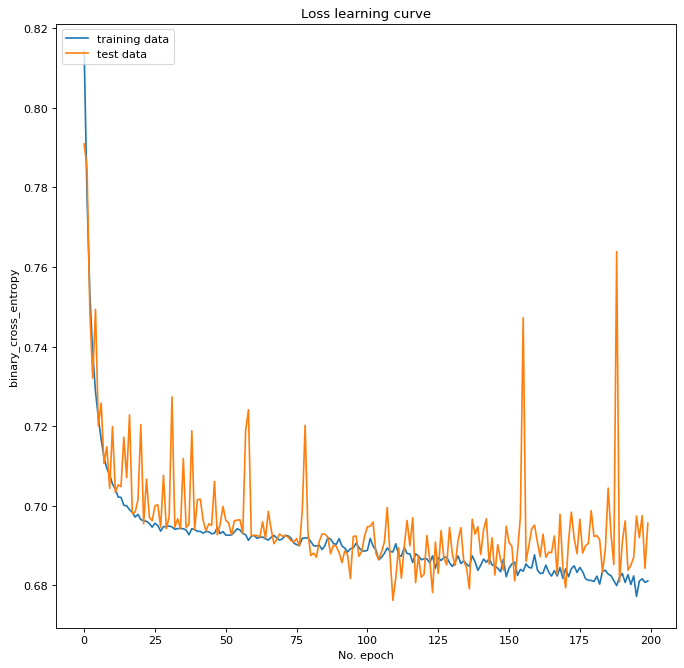

In [ ]:
history.history['loss']
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.title("Loss learning curve")
plt.plot(np.array(history.history['loss'][1::]), label='training data')#np.mean((np.array(history.history['loss'][1::])).reshape(-1, 10), axis=1)
plt.plot(np.array(history.history['val_loss'][1::]), label='test data')#np.mean((np.array(history.history['val_loss'][1::])).reshape(-1, 10), axis=1)
plt.ylabel('binary_cross_entropy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

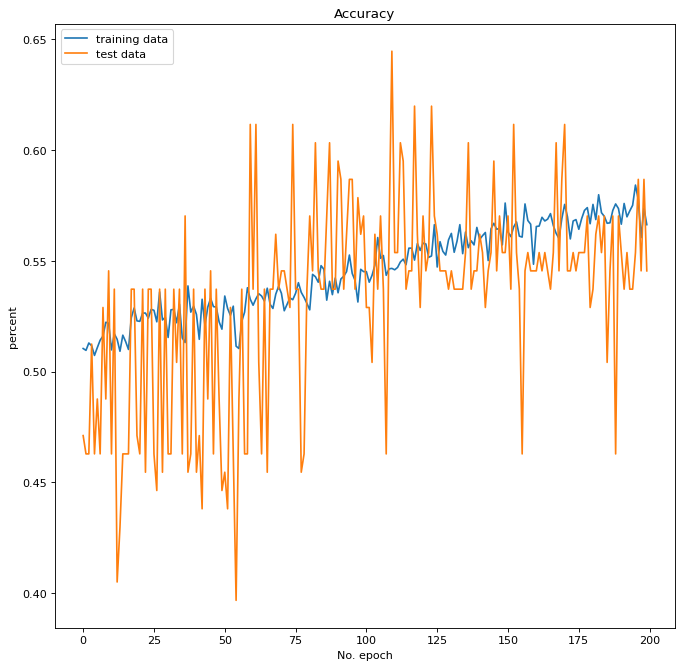

In [ ]:
history.history['loss']
figure(figsize=(10, 10), dpi=80)
plt.title("Accuracy")
plt.plot(np.array(history.history['accuracy'][1::]), label='training data') #np.mean((np.array(history.history['accuracy'][1::])).reshape(-1, 10), axis=1)
plt.plot(np.array(history.history['val_accuracy'][1::]), label='test data')#np.mean((np.array(history.history['val_accuracy'][1::])).reshape(-1, 10), axis=1)
plt.ylabel('percent')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from scipy.spatial.distance import pdist, squareform #scipy spatial distance
import sklearn as sk
import sklearn.metrics.pairwise
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, LeakyReLU
from keras import metrics
from keras import backend as K
import time
from skimage.transform import resize

from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
from keras.utils import np_utils

In [ ]:
def recurrence_plot(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = sk.metrics.pairwise.pairwise_distances(s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    #Z = squareform(d)
    return d

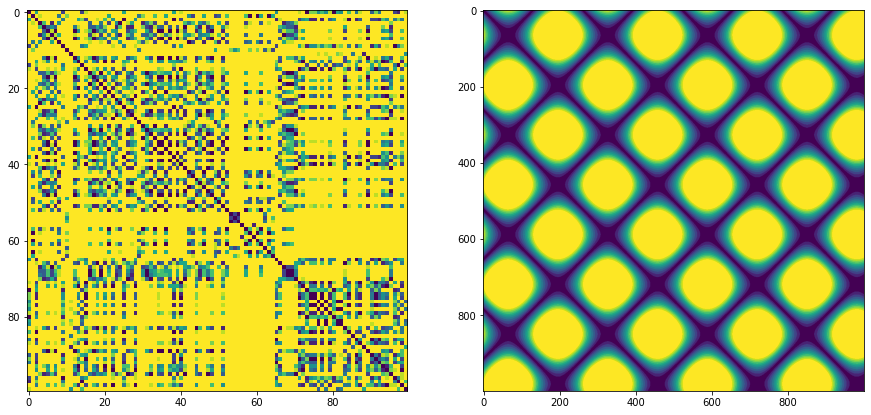

In [ ]:
fig = plt.figure(figsize=(15,14))
random_series = np.random.random(1000)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(recurrence_plot(x_train[11][:,None]))
sinus_series = np.sin(np.linspace(0,24,1000))
ax = fig.add_subplot(1, 2, 2)
ax.imshow(recurrence_plot(sinus_series[:,None]));

In [ ]:
p_train = np.zeros((x_train.shape[0],32, 32))
for c in range(x_train.shape[0]):
        dat = recurrence_plot(x_train[c][:,None],steps =100)
        dat = resize(dat, (32,32),mode='constant')
        p_train[c,:,:] = dat
        
p_train.shape


(4810, 32, 32)

In [ ]:
p_test = np.zeros((x_test.shape[0],32, 32))
for c in range(x_test.shape[0]):
        dat = recurrence_plot(x_test[c][:,None],steps =100)
        dat = resize(dat, (32,32),mode='constant')
        p_test[c,:,:] = dat
        
p_test.shape

(121, 32, 32)

In [ ]:
model = Sequential()
 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,32,32), data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(LeakyReLU(alpha=0.03))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
p_train = p_train.reshape(p_train.shape[0], 1, 32,32)
#convert to float32 and normalize to [0,1]
p_train = p_train.astype('float32')
p_train /= np.amax(p_train)
# y_train = to_categorical(y_train, 2)
# y_test= to_categorical(y_test, 2)

In [ ]:
model.fit(p_train, y_train, epochs=200, batch_size=16,shuffle=True)

Epoch 1/200


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/sequential_115/conv2d_4/Conv2D/Conv2DBackpropFilter' defined at (most recent call last):
    File "C:\Program Files\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Program Files\Python39\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Program Files\Python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Program Files\Python39\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Program Files\Python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Program Files\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Program Files\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Program Files\Python39\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Program Files\Python39\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Program Files\Python39\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Program Files\Python39\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Program Files\Python39\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Program Files\Python39\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Program Files\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Program Files\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Program Files\Python39\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Program Files\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Program Files\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Program Files\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\hirsh\AppData\Local\Temp/ipykernel_28476/2748865033.py", line 1, in <module>
      model.fit(p_train, y_train, epochs=200, batch_size=16,shuffle=True)
    File "C:\Program Files\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Program Files\Python39\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Program Files\Python39\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Program Files\Python39\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Program Files\Python39\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Program Files\Python39\lib\site-packages\keras\engine\training.py", line 863, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Program Files\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 530, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Program Files\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 583, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Program Files\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 464, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential_115/conv2d_4/Conv2D/Conv2DBackpropFilter'
Conv2DCustomBackpropFilterOp only supports NHWC.
	 [[{{node gradient_tape/sequential_115/conv2d_4/Conv2D/Conv2DBackpropFilter}}]] [Op:__inference_train_function_17300011]